In [2]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
font = {'family' : 'DejaVu Sans',
        'size'   : fs}
mpl.rc('font', **font)

In [2]:
font = {'family' : 'DejaVu Sans',
        'size'   : fs}
mpl.rc('font', **font)

In [13]:
# for an index to multiple before diffusivity and conductivity 
# (0,0) and (4.541,1) higher than 4.541 keep 1; below than 0 keep 0 
ratio = np.linspace(-10, 10, 100)
def Coff_EC(ratio):
    return (
        (ratio<0)*0 + 
        (ratio>=0 and ratio<=4.541)* ( 1/4.541 * ratio ) 
        + (ratio>4.541)* 1
    )
Coff_EC_r = Coff_EC(ratio);
plt.plot(ratio,Coff_EC_r)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [18]:
ratio_2 = np.linspace(-10, 10, 100)
def Coff_EC(ratio):
    if ratio<4.541:
        return 1/4.541 * ratio
    else:
        return 1
Coff_EC_r = Coff_EC(ratio_2);
plt.plot(ratio_2,Coff_EC_r)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

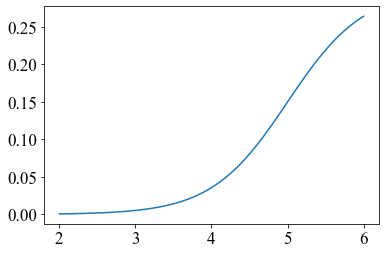

In [8]:
ratio = np.linspace(2, 6, 100)
def Xi_EC(ratio):
    return 0.15 + 0.15*np.tanh(ratio-5)
Xi = Xi_EC(ratio);
plt.plot(ratio,Xi)

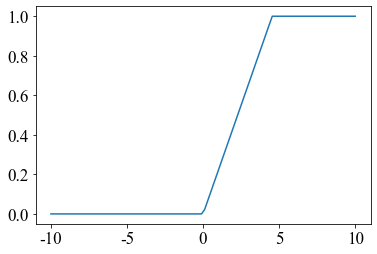

In [26]:

def Coff_EC(x):
  return np.piecewise(
    x, 
    [x < 0, ((x >= 0) & (x < 4.541)), x >= 4.541], 
    [lambda x : 0, lambda x : 1/4.541*x, lambda x : 1])
ratio_2 = np.linspace(-10, 10, 100)
Coff_EC_r = Coff_EC(ratio_2);
plt.plot(ratio_2,Coff_EC_r)

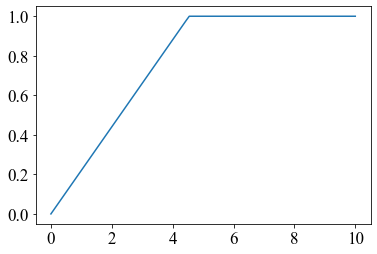

In [12]:
def Coff_EC(x):
  return np.piecewise(
    x, 
    [x < 4.541, x >= 4.541], 
    [lambda x : 1/4.541*x, lambda x : 1])
ratio_2 = np.linspace(0, 10, 100)
Coff_EC_r = Coff_EC(ratio_2);
plt.plot(ratio_2,Coff_EC_r)

C:\Users\rl1120\AppData\Local\Temp\ipykernel_25560\803917671.py:9: RuntimeWarning: divide by zero encountered in divide
  x_EC = 1 / (1+ ( rho_electrolyte - c_e*M_LiPF6 - c_EC*M_EC  )/M_EMC/c_EC   )


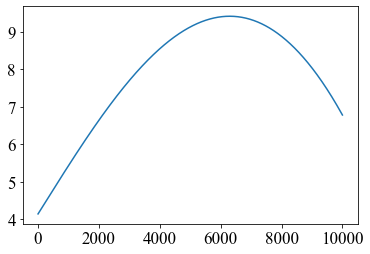

In [20]:
def electrolyte_conductivity_Ding2001(c_e, c_EC,  T):
    # c_e is lithium ion concentration in electrolyte in mol/m3, need to change to mol/kg
    # also be careful that T here is deg, while others are K
    rho_electrolyte = 1300 # in kg/m3
    c_e_kg = c_e / rho_electrolyte     # in mol/kg 
    M_LiPF6 = 151.905/1000  # kg/mol
    M_EC = 88.062/1000  # kg/mol
    M_EMC = 104.104/1000 # kg/mol
    x_EC = 1 / (1+ ( rho_electrolyte - c_e*M_LiPF6 - c_EC*M_EC  )/M_EMC/c_EC   )
    kai = -3.37115 + 12.5608*c_e_kg - 7.89593*c_e_kg**2 + 3.51922*c_e_kg**3-1.15471*c_e_kg**4 +18.1863*x_EC - 6.22756*c_e_kg*x_EC - 13.6916*c_e_kg**2*x_EC +8.43904*c_e_kg**3*x_EC - 7.83732*x_EC**2 + 19.607*c_e_kg*x_EC**2  - 18.4529*c_e_kg**2*x_EC**2 -30.6369*x_EC**3 + 29.2*c_e_kg*x_EC**3 - 0.0429918*T + 0.180877*c_e_kg*T -0.0836202*c_e_kg**2*T + 0.0230098*c_e_kg**3*T + 0.195946*T*x_EC +0.0676686*c_e_kg*x_EC*T - 0.14134*c_e_kg**2*x_EC*T + 0.147429*x_EC**2*T  +0.173059*c_e_kg*x_EC**2*T - 0.51634*x_EC**3*T - 0.000223097*T**2 +0.000111233*c_e_kg*T**2 + 0.0000495286*c_e_kg**2*T**2  +0.000952777*x_EC*T**2 + 0.00117334 *c_e_kg*x_EC*T**2-0.000619157*x_EC**2*T**2 - 3.46897E-7*T**3 - 2.75041E-6*c_e_kg*T**3 -5.57653E-6*x_EC*T**3 
    return kai 

c_EC = np.linspace(0, 1e4, 1000)




C:\Users\rl1120\AppData\Local\Temp\ipykernel_25560\803917671.py:9: RuntimeWarning: divide by zero encountered in divide
  x_EC = 1 / (1+ ( rho_electrolyte - c_e*M_LiPF6 - c_EC*M_EC  )/M_EMC/c_EC   )


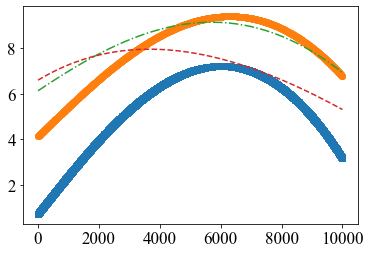

In [23]:
plt.plot(c_EC,electrolyte_conductivity_Ding2001(500, c_EC,25),"-s",)
plt.plot(c_EC,electrolyte_conductivity_Ding2001(1000, c_EC,25),"-o",)
plt.plot(c_EC,electrolyte_conductivity_Ding2001(1500, c_EC,25),"-.",)
plt.plot(c_EC,electrolyte_conductivity_Ding2001(2000, c_EC,25),"--",)

In [33]:
max(Xi)

0.8985108234878194

At -200.0, Hayamizu2012 func is: 0.22621321041439535
At 0, Hayamizu2012 func is: 0.3043000000000001
At 2000, Hayamizu2012 func is: 0.7767797982680288
At 4541, Hayamizu2012 func is: 0.9715051473107859
At 5000, Hayamizu2012 func is: 0.985923102956799
At 10000.0, Hayamizu2012 func is: 1.0168774507319742


Text(0, 0.5, 'Coefficient')

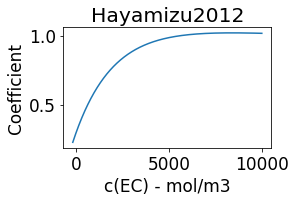

In [19]:
# add coff from Hayamizu2012:
fs=17;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)
from numpy import exp
ratio = np.linspace(-2e2, 1e4, 1000)
def Hayamizu2012(x):
    a=1.092; b=-6.497e-6; c=-0.7877; d=-0.0004808
    return (
        a*exp(b*x)+c*exp(d*x) )
coff = Hayamizu2012(ratio)
fig, ax = plt.subplots(figsize=(4, 2.7), layout='constrained')
ax.plot(ratio,coff,label='Hayamizu2012')
test_list = [-2e2,0,2000,4541,5000,1e4]
for t_i in test_list:
    print(f"At {t_i}, Hayamizu2012 func is: {Hayamizu2012(t_i)}");
ax.set_title("Hayamizu2012",loc='center')
#ax.legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False)
ax.set_xlabel("c(EC) - mol/m3")
ax.set_ylabel("Coefficient")

At 0, tanh func is: 0.00012339457598625758
At 0, tanh2 func is:  0.0016121527485262743
At 0, tanh3 func is:  0.010986942630593188
At 0, Exp func is:  0.28346868942621073
At 2000, tanh func is: 0.2689414213699951
At 2000, tanh2 func is:  0.32865254651727005
At 2000, tanh3 func is:  0.3775406687981454
At 2000, Exp func is:  0.6321205588285577
At 4541, tanh func is: 0.9998952678833248
At 4541, tanh2 func is:  0.9985658020603478
At 4541, tanh3 func is:  0.9898692749632927
At 4541, Exp func is:  0.8422904139120848
At 5000, tanh func is: 0.9999832985781518
At 5000, tanh2 func is:  0.9996131717493575
At 5000, tanh3 func is:  0.9959298622841039
At 5000, Exp func is:  0.8646647167633873
At 10000.0, tanh func is: 0.9999999999999656
At 10000.0, tanh2 func is:  0.9999999997581872
At 10000.0, tanh3 func is:  0.9999998144608981
At 10000.0, Exp func is:  0.9744384667934926


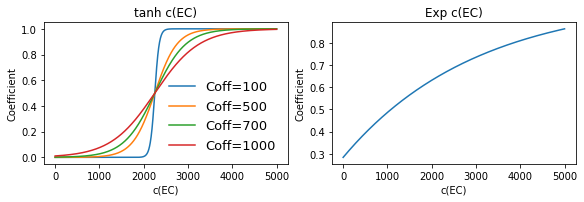

In [7]:
# add coff in c(EC) with tanh
coff = 1     #  0.3;
ratio = np.linspace(0, 5000, 1000)
def tanh0(c_EC):
    return (
        ( coff/2 + coff/2 *  np.tanh((c_EC-4500*0.5)/100)) )
def tanh(c_EC):
    return (
        ( coff/2 + coff/2 *  np.tanh((c_EC-4500*0.5)/500)) )
def tanh2(c_EC):
    return (
        ( coff/2 + coff/2 *  np.tanh((c_EC-4500*0.5)/700)) )
def tanh3(c_EC):
    return (
        ( coff/2 + coff/2 *  np.tanh((c_EC-4500*0.5)/1000)) )
def Coff_Simon(c_EC):
    return (
        (1 - np.exp(-(c_EC+1000)/3000))  )
Xi = tanh(ratio);Xi2 = tanh2(ratio);Xi3 = tanh3(ratio);Xi0= tanh0(ratio);
Coff_S = Coff_Simon(ratio)
fig, ax = plt.subplots(1,2,figsize=(8, 2.7), layout='constrained')
ax[0].plot(ratio,Xi0,label='Coff=100')
ax[0].plot(ratio,Xi,label='Coff=500')
ax[0].plot(ratio,Xi2,label='Coff=700')
ax[0].plot(ratio,Xi3,label='Coff=1000')
ax[1].plot(ratio,Coff_S)
ax[0].set_title("tanh c(EC)",loc='center')
ax[1].set_title("Exp c(EC)",loc='center')
ax[0].legend(prop={'family':'DejaVu Sans','size':fs-4},loc='best',frameon=False)
for i in range(0,2):
    ax[i].set_xlabel("c(EC)")
    ax[i].set_ylabel("Coefficient")
test_list = [0,2000,4541,5000,1e4]
for t_i in test_list:
    print(f"At {t_i}, tanh func is: {tanh(t_i)}");
    print(f"At {t_i}, tanh2 func is:  {tanh2(t_i)}");
    print(f"At {t_i}, tanh3 func is:  {tanh3(t_i)}");
    print(f"At {t_i}, Exp func is:  {Coff_Simon(t_i)}");



At 0, tanh func is: 0.3000863762031903
At 0, tanh2 func is:  0.3011285069239683
At 0, tanh3 func is:  0.30769085984141514
At 0, Exp func is:  0.28346868942621073
At 2000, tanh func is: 0.4882589949589965
At 2000, tanh2 func is:  0.530056782562089
At 2000, tanh3 func is:  0.5642784681587018
At 2000, Exp func is:  0.6321205588285577
At 4541, tanh func is: 0.9999266875183273
At 4541, tanh2 func is:  0.9989960614422434
At 4541, tanh3 func is:  0.9929084924743048
At 4541, Exp func is:  0.8422904139120848
At 5000, tanh func is: 0.9999883090047061
At 5000, tanh2 func is:  0.9997292202245501
At 5000, tanh3 func is:  0.9971509035988726
At 5000, Exp func is:  0.8646647167633873
At 10000.0, tanh func is: 0.9999999999999758
At 10000.0, tanh2 func is:  0.999999999830731
At 10000.0, tanh3 func is:  0.9999998701226286
At 10000.0, Exp func is:  0.9744384667934926


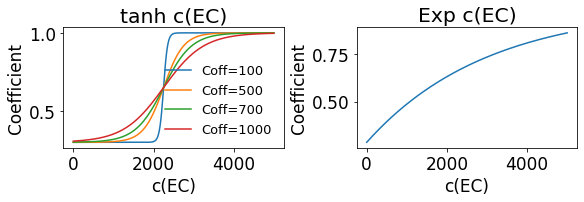

In [20]:
# add coff in c(EC) with tanh
coff = 0.7     #  0.3;
ratio = np.linspace(0, 5000, 1000)
def tanh0(c_EC):
    return (
        ( 0.3+coff/2 + coff/2 *  np.tanh((c_EC-4500*0.5)/100)) )
def tanh(c_EC):
    return (
        ( 0.3+coff/2 + coff/2 *  np.tanh((c_EC-4500*0.5)/500)) )
def tanh2(c_EC):
    return (
        ( 0.3+coff/2 + coff/2 *  np.tanh((c_EC-4500*0.5)/700)) )
def tanh3(c_EC):
    return (
        ( 0.3+coff/2 + coff/2 *  np.tanh((c_EC-4500*0.5)/1000)) )
def Coff_Simon(c_EC):
    return (
        (1 - np.exp(-(c_EC+1000)/3000))  )
Xi = tanh(ratio);Xi2 = tanh2(ratio);Xi3 = tanh3(ratio);Xi0= tanh0(ratio);
Coff_S = Coff_Simon(ratio)
fig, ax = plt.subplots(1,2,figsize=(8, 2.7), layout='constrained')
ax[0].plot(ratio,Xi0,label='Coff=100')
ax[0].plot(ratio,Xi,label='Coff=500')
ax[0].plot(ratio,Xi2,label='Coff=700')
ax[0].plot(ratio,Xi3,label='Coff=1000')
ax[1].plot(ratio,Coff_S)
ax[0].set_title("tanh c(EC)",loc='center')
ax[1].set_title("Exp c(EC)",loc='center')
ax[0].legend(prop={'family':'DejaVu Sans','size':fs-4},loc='best',frameon=False)
for i in range(0,2):
    ax[i].set_xlabel("c(EC)")
    ax[i].set_ylabel("Coefficient")
test_list = [0,2000,4541,5000,1e4]
for t_i in test_list:
    print(f"At {t_i}, tanh func is: {tanh(t_i)}");
    print(f"At {t_i}, tanh2 func is:  {tanh2(t_i)}");
    print(f"At {t_i}, tanh3 func is:  {tanh3(t_i)}");
    print(f"At {t_i}, Exp func is:  {Coff_Simon(t_i)}");



0.000552778636923601
0.18242552380635635
0.8175744761936437
0.99781292331051
0.9994472213630764
0.9999724643088854


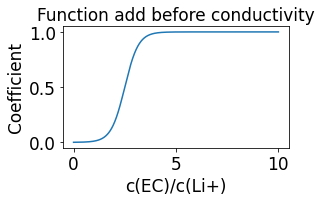

In [16]:
coff = 1     #  0.3;
ratio = np.linspace(0, 10, 1000)
def Xi_EC(ratio):
    return (
        ( coff/2 + coff/2 *  np.tanh((ratio-5*0.5)*1.5)) )
Xi = Xi_EC(ratio);
fig, ax = plt.subplots(figsize=(4, 2.7), layout='constrained')
ax.plot(ratio,Xi)
ax.set_title("Function add before conductivity",loc='center')
ax.set_xlabel("c(EC)/c(Li+)")
ax.set_ylabel("Coefficient")
print(Xi_EC(0))
print(Xi_EC(2))
print(Xi_EC(3))
print(Xi_EC(4.541))
print(Xi_EC(5))
print(Xi_EC(6))

-0.001617265358609954
-0.0457441460270106
-0.2505964446323605


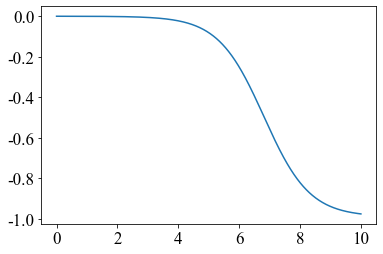

In [35]:
coff = 0.99      #  0.3;
ratio = np.linspace(0, 10, 1000)
def Xi_EC(ratio):
    return ((-(0.0+ coff/2 + coff/2 *  np.tanh((ratio-4.541*1.5)/1.5)))  )
Xi = Xi_EC(ratio);
plt.plot(ratio,Xi)

print(Xi_EC(2))
print(Xi_EC(4.541))
print(Xi_EC(6))

0.4050729470237759
0.8985117079459788
0.7325952892180764


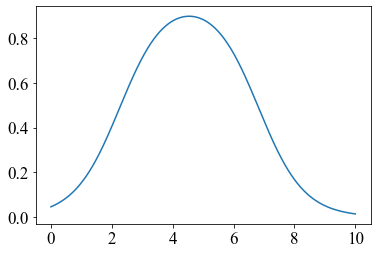

In [34]:
coff = 0.99      #  0.3;
ratio = np.linspace(0, 10, 1000)
def Xi_EC(ratio):
    return ((-(0.0+ coff/2 + coff/2 *  np.tanh((ratio-4.541*1.5)/1.5))) +
        ( coff/2 + coff/2 *  np.tanh((ratio-4.541*0.5)/1.5)) )
Xi = Xi_EC(ratio);
plt.plot(ratio,Xi)

print(Xi_EC(2))
print(Xi_EC(4.541))
print(Xi_EC(6))

0.01048394500259442
0.17314363348151918
0.9877169506337997


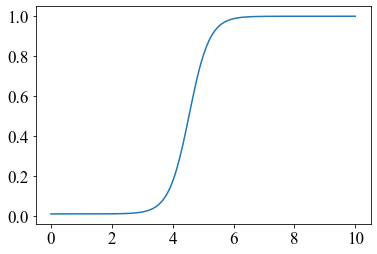

In [5]:
coff = 0.99      #  0.3;
ratio = np.linspace(0, 10, 1000)
def Xi_EC(ratio):
    return 0.01+ coff/2 + coff/2 *  np.tanh((ratio-4.541)*1.5)
Xi = Xi_EC(ratio);
plt.plot(ratio,Xi)

print(Xi_EC(2))
print(Xi_EC(4))
print(Xi_EC(6))

0.968232141362076
0.9985376652549612
0.9894130356174036


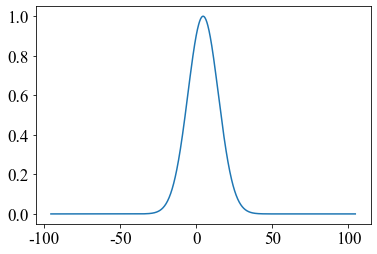

In [14]:
a = 1; b = 4.541; c= 10
ratio = np.linspace(b-100, b+100, 1000)
def Fun_r(x):
    return a * np.exp( - 0.5*(x-b)*(x-b)  / (c*c) )
Xi = Fun_r(ratio);
plt.plot(ratio,Xi)

print(Fun_r(2))
print(Fun_r(4))
print(Fun_r(6))


0.039623198957275306
0.863863507576353
0.3449552777719322


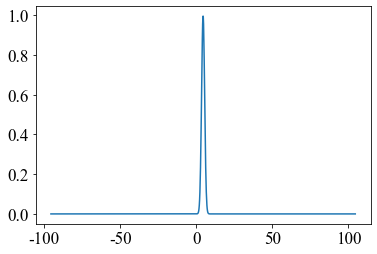

In [15]:
a = 1; b = 4.541; c= 1
ratio = np.linspace(b-100, b+100, 1000)
def Fun_r(x):
    return a * np.exp( - 0.5*(x-b)*(x-b)  / (c*c) )
Xi = Fun_r(ratio);
plt.plot(ratio,Xi)

print(Fun_r(2))
print(Fun_r(4))
print(Fun_r(6))

In [8]:
print(1 * np.exp( - 0.5*(1)^2  / 4 ))

TypeError: unsupported operand type(s) for ^: 'float' and 'float'

Ratio=-2e5, t_plus= 0.010000000000000009
Ratio=2e5, t_plus= 1.0
Ratio=1, t_plus= 0.010830992262304162
Ratio=2, t_plus= 0.053417315035218516
Ratio=4.541, t_plus= 0.9991690077376958


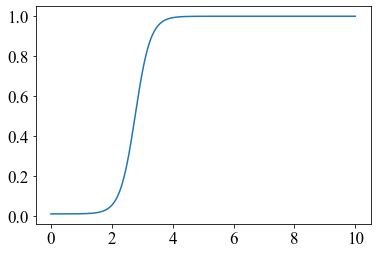

In [10]:
import numpy as np
coff = 0.99 #  0.3;
ratio = np.linspace(0, 10, 10000)
def Xi_EC(ratio):
    return  0.01+ coff/2 + coff/2 *  np.tanh((ratio-2.7705)*2)
Xi = Xi_EC(ratio);
plt.plot(ratio,Xi)
print("Ratio=-2e5, t_plus=",Xi_EC(-2e5))
print("Ratio=2e5, t_plus=",Xi_EC(2e5))
print("Ratio=1, t_plus=",Xi_EC(1))
print("Ratio=2, t_plus=",Xi_EC(2))
#print("Ratio=, t_plus=",Xi_EC(2.7705))
print("Ratio=4.541, t_plus=",Xi_EC(4.541))


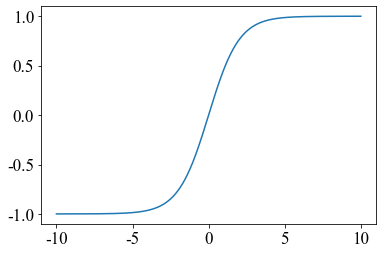

In [33]:
ratio = np.linspace(-10, 10, 10000)
plt.plot(ratio,np.tanh(ratio/2))

In [50]:
460.92 - 20.08*20
(460.92 - 20.08*20)/20.08
print(20.08*23-460.92)

0.9199999999999591
